In [396]:
import pandas as pd
import numpy as np
%matplotlib inline
data = pd.read_csv('fertility_Diagnosis.csv')
data.columns = ['Season','Age','Childish Diseases','Accident or Serious Trauma','Surgical Intervention','High fevers in the last year','Frequency of alcohol consumption','Smoking habit','Number of hours spent sitting per day','Output']
data.head()

,Season,Age,Childish Diseases,Accident or Serious Trauma,Surgical Intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1


                                         Season       Age  Childish Diseases  \
Season                                 1.000000  0.065410          -0.176509   
Age                                    0.065410  1.000000           0.080551   
Childish Diseases                     -0.176509  0.080551           1.000000   
Accident or Serious Trauma            -0.096274  0.215958           0.162936   
Surgical Intervention                 -0.006210  0.271945          -0.140972   
High fevers in the last year          -0.221818  0.120284           0.075645   
Frequency of alcohol consumption      -0.041290 -0.247940           0.038538   
Smoking habit                         -0.028085  0.072581           0.090535   
Number of hours spent sitting per day -0.019021 -0.442452          -0.147761   
Output                                 0.192417  0.115229          -0.040261   

                                       Accident or Serious Trauma  \
Season                                            

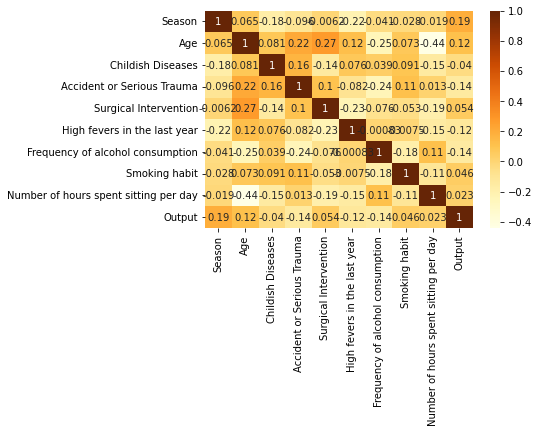

In [397]:
import seaborn as sb
print(data.corr())
dataplot = sb.heatmap(data.corr(), cmap="YlOrBr",annot = True)

In [398]:

from sklearn.model_selection import train_test_split 
from sklearn import tree

X= data.drop(['Output'],axis=1)
Y= data['Output']

X_train, X_test, Y_train, Y_test, = train_test_split(X,Y, test_size = 0.5, random_state = 1)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns,class_names=['1','2'],filled=True,out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)


In [399]:
testdata = pd.read_csv('fertility_Diagnosis_Half.csv')
testdata.columns = ['Season','Age','Childish Diseases','Accident or Serious Trauma','Surgical Intervention','High fevers in the last year','Frequency of alcohol consumption','Smoking habit','Number of hours spent sitting per day','Output']
testY = testdata['Output']
testX = testdata.drop(['Output'],axis=1)
predY = clf.predict(testX)
predictions = pd.concat([testdata['Smoking habit'],pd.Series(predY,name='Output')],axis=1)
predictions


,Smoking habit,Output
0,0,0
1,1,1
2,-1,0
3,-1,0
4,-1,1
5,0,0
6,-1,0
7,-1,0
8,-1,0
9,-1,0


In [400]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

print('accuracy is %.2f' % (accuracy_score(testY,predY)))
print('precision is %.2f' % (precision_score(testY,predY)))
print('F1 is %.2f' % (f1_score(testY,predY)))

accuracy is 0.90
precision is 1.00
F1 is 0.62


In [401]:
from sklearn import tree
Y = testdata['Output']
X = testdata.drop(['Output'],axis=1)
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X,Y)



In [402]:
testdata = pd.read_csv('fertility_Diagnosis_Half.csv')
testdata.columns = ['Season','Age','Childish Diseases','Accident or Serious Trauma','Surgical Intervention','High fevers in the last year','Frequency of alcohol consumption','Smoking habit','Number of hours spent sitting per day','Output']
testY = testdata['Output']
testX = testdata.drop(['Output'],axis=1)
predY = clf.predict(testX)
predictions = pd.concat([testdata['Smoking habit'],pd.Series(predY,name='Output')],axis=1)
predictions

,Smoking habit,Output
0,0,0
1,1,1
2,-1,0
3,-1,0
4,-1,1
5,0,0
6,-1,0
7,-1,0
8,-1,0
9,-1,0


In [403]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

print('accuracy is %.2f' % (accuracy_score(testY,predY)))
print('precision is %.2f' % (precision_score(testY,predY)))
print('F1 is %.2f' % (f1_score(testY,predY)))

accuracy is 1.00
precision is 1.00
F1 is 1.00


In [404]:
from sklearn import tree
Y = testdata['Output']
X = testdata.drop(['Output'],axis=1)
clf = tree.DecisionTreeClassifier(max_depth = 6)
clf = clf.fit(X,Y)

Text(0, 0.5, 'Accuracy')

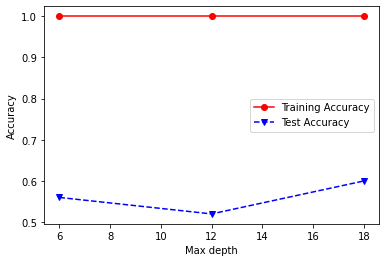

In [405]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=1)
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
maxdepths = [6, 12, 18]
trainAcc = np.zeros (len(maxdepths))
testAcc = np.zeros (len(maxdepths))
index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier (max_depth=depth)
    clf = clf.fit(X_train,Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train,Y_predTrain)
    testAcc[index] = accuracy_score(Y_test,Y_predTest)
    index += 1
                                                   
plt.plot(maxdepths, trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend (['Training Accuracy', 'Test Accuracy'])
plt.xlabel ('Max depth')
plt.ylabel ('Accuracy')


Text(0, 0.5, 'Precision')

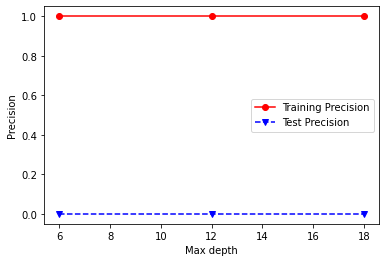

In [406]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=1)
from sklearn import tree
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
maxdepths = [6, 12, 18]
trainAcc = np.zeros (len(maxdepths))
testAcc = np.zeros (len(maxdepths))
index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier (max_depth=depth)
    clf = clf.fit(X_train,Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = precision_score(Y_train,Y_predTrain)
    testAcc[index] = precision_score(Y_test,Y_predTest)
    index += 1
                                                   
plt.plot(maxdepths, trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend (['Training Precision', 'Test Precision'])
plt.xlabel ('Max depth')
plt.ylabel ('Precision')

Text(0, 0.5, 'f1')

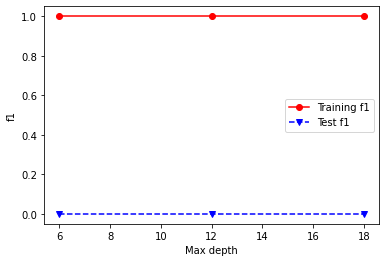

In [407]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=1)
from sklearn import tree
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
maxdepths = [6, 12, 18]
trainAcc = np.zeros (len(maxdepths))
testAcc = np.zeros (len(maxdepths))
index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier (max_depth=depth)
    clf = clf.fit(X_train,Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = f1_score(Y_train,Y_predTrain)
    testAcc[index] = f1_score(Y_test,Y_predTest)
    index += 1
                                                   
plt.plot(maxdepths, trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend (['Training f1', 'Test f1'])
plt.xlabel ('Max depth')
plt.ylabel ('f1')

Text(0, 0.5, 'recall')

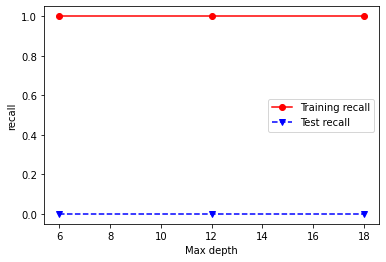

In [408]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=1)
from sklearn import tree
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
maxdepths = [6, 12, 18]
trainAcc = np.zeros (len(maxdepths))
testAcc = np.zeros (len(maxdepths))
index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier (max_depth=depth)
    clf = clf.fit(X_train,Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = recall_score(Y_train,Y_predTrain)
    testAcc[index] = recall_score(Y_test,Y_predTest)
    index += 1
                                                   
plt.plot(maxdepths, trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend (['Training recall', 'Test recall'])
plt.xlabel ('Max depth')
plt.ylabel ('recall')

Text(0, 0.5, 'Accuracy')

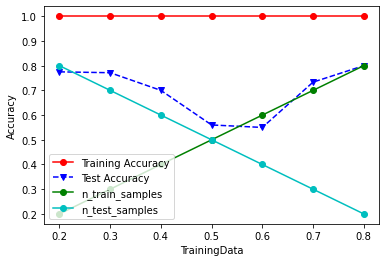

In [409]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

maxTrainingData = [0.2,0.3,0.4,0.5,0.6,0.7,0.8]

trainAcc = np.zeros(len(maxTrainingData))
testAcc = np.zeros(len(maxTrainingData))
n_train_samples = np.zeros(len(maxTrainingData))
n_test_samples = np.zeros(len(maxTrainingData))

index = 0
for trainingData in maxTrainingData:
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=1 - trainingData,random_state=1)
    clf = tree.DecisionTreeClassifier(max_depth=25)
    clf = clf.fit(X_train,Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    n_train_samples[index] = trainingData
    n_test_samples[index] = 1 - trainingData
    trainAcc[index] = accuracy_score(Y_train,Y_predTrain)
    testAcc[index] = accuracy_score(Y_test,Y_predTest)
    index += 1
    
plt.plot(maxTrainingData,trainAcc,'ro-',maxTrainingData,testAcc,'bv--',maxTrainingData,n_train_samples,'go-',maxTrainingData,n_test_samples,'co-')
plt.legend(['Training Accuracy','Test Accuracy','n_train_samples','n_test_samples'])
plt.xlabel ('TrainingData')
plt.ylabel ('Accuracy')
    




